# K-Means Clustering

In [86]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data (Iris)

In [87]:
iris = pd.DataFrame(data=load_iris()['data'], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

print(iris.info())
display(iris)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Model Fitting
### K-Means Model Primary Parameter
- `n_cluters`: 군집 개수
- `init`: 초기 중심점 위치가 무작위로 지정되어 중심점 이동 iteration이 크게 증가하지 않도록 방지해주는 parameter
- `max_iter=300`: 중심점 이동 최대 횟수

In [96]:
kmeans_model = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans_model.fit(iris)
kmeans_model.predict(iris)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [98]:
iris['target'] = load_iris()['target']
iris['cluster'] = kmeans_model.labels_ # 실제 정답 레이블과는 전혀 다른 순서

iris_result = iris.groupby('target')['cluster'].value_counts()
print(iris_result)

target  cluster
0       0          50
1       1          48
        2           2
2       2          36
        1          14
Name: cluster, dtype: int64


## PCA 차원축소
- 2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(load_iris()['data'])

iris['pca_x'] = pca_transformed[:, 0]
iris['pca_y'] = pca_transformed[:, 1]
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


## Visualize Cluster

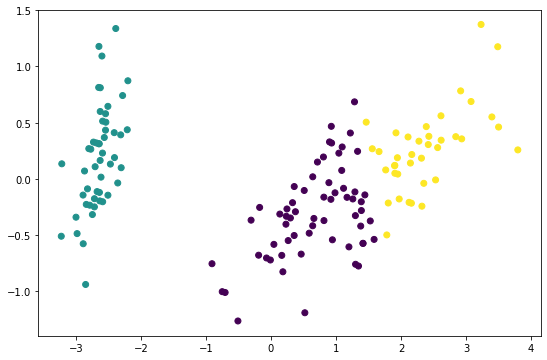

In [91]:
plt.figure(figsize=(9,6))
plt.scatter(x=iris.loc[:, 'pca_x'], y=iris.loc[:, 'pca_y'], c=iris['cluster'])

## Clustering Evaluation

### 실루엣 분석

In [92]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(load_iris()['data'], iris['cluster'])
print(score_samples.shape)

iris['silhouette_coeff'] = score_samples

# 전체 실루엣 계수가 1에 가까울수록 좋다 (0.5 이상은 좋은편)
average_score = silhouette_score(load_iris()['data'], iris['cluster'])
print('Iris datasets Silhouette Analysis Score: {0:.3f}'.format(average_score))
display(iris)

(150,)
Iris datasets Silhouette Analysis Score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0.852955
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,0.815495
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,0.829315
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299,0.805014
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755,0.849302
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532,0.425136
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317,0.104171
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859,0.314930
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628,0.352454


<AxesSubplot:>

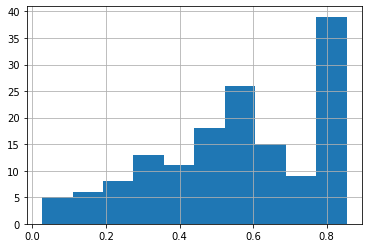

In [93]:
iris['silhouette_coeff'].hist()

### 군집 개수 선정

In [94]:
import matplotlib.cm as cm
import math

def visualize_silhouette(cluster_lists, x_features):
    # 입력값으로 클러스터링 수 들을 리스트로 받아서, 각 개수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # 리스트에 담긴 클러스터링 수 만큼의 sub-figures를 가지는 axes 생성
    fig, axes = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 담긴 클러스터링 수들을 차례로 iteration 수행하면서 실루엣 계수 시각화
    for idx, n_cluster in enumerate(cluster_lists):
        
        # K-Means Clustering 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        kmeans_model = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = kmeans_model.fit_predict(x_features)
        
        sil_avg = silhouette_score(x_features, cluster_labels)
        sil_values = silhouette_samples(x_features, cluster_labels)
        
        y_lower = 10
        axes[idx].set_title("Number of Cluster: " + str(n_cluster) + "\n Silhouette Score: " + str(round(sil_avg, 3)))
        axes[idx].set_xlabel("The silhouette coeffcient values")
        axes[idx].set_ylabel("Cluster label")
        axes[idx].set_xlim([-0.1, 1])
        axes[idx].set_ylim([0, len(x_features) + (n_cluster+1) * 10])
        axes[idx].set_yticks([]) # Clear the yaxis labels / ticks
        axes[idx].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 수마다 fill_betweenx() 형태의 막대그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axes[idx].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, facecolor=color, alpha=0.7)
            axes[idx].text(-0.05, y_lower+0.5*size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axes[idx].axvline(x=sil_avg, color='red', linestyle="--")

- 3개로 군집화한 것이 전체 실루엣 계수의 평균값(붉은 세로선)이 아주 높지는 않지만
- 군집에 속해있는 데이터 분포가 고르고 개별 군집의 평균값 편차가 적기 때문에 적절한 군집이다.

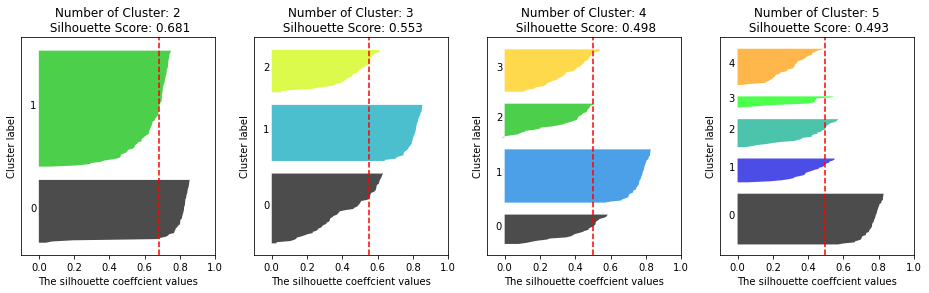

In [95]:
visualize_silhouette([2,3,4,5], load_iris()['data'])